## Exploration :
### Random exploration on the dataset, trying to guess which feature is interesting and which is not


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Data/train.csv', na_values=[-999.0]).dropna()
df.shape

(68114, 32)

In [2]:
y = df['Prediction'].replace({'s' : 0, 'b' : 1}).values
new_df = df.drop(['Prediction'], axis=1)
correlations = []

for col in new_df.columns :
    tmp = new_df[col].values
    c = np.abs(np.corrcoef(y, tmp)[0,1])
    if(c > 0.15) :
        correlations.append((col, c))

# Data importation

In [3]:
import sys
sys.path.insert(0, 'scripts')
from proj1_helpers import load_csv_data
from Functions import *

In [17]:
y, X, ids = load_csv_data('Data/train.csv') #for y : ['b', 's'] -> [-1, 1]

In [18]:
X = X[X > -900]

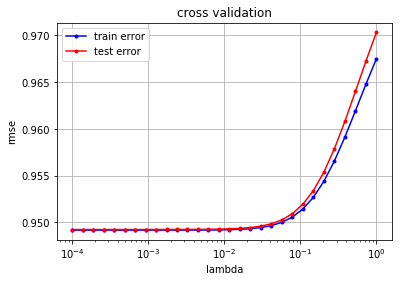

In [20]:
def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************  
    for lambda_ in lambdas :
        min_rmse_tr = []
        min_rmse_te = []
        for k in range(k_fold) :
            loss_tr, loss_te, _ = cross_validation(y, X, k_indices, k,lambda_ , degree)
            min_rmse_tr.append(loss_tr)
            min_rmse_te.append(loss_te)
        rmse_tr.append(np.mean(min_rmse_tr))
        rmse_te.append(np.mean(min_rmse_te))
        
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()